In [1]:
%load_ext autoreload



In [2]:
%autoreload 2

In [5]:
import os, os.path, fnmatch, re
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import Neptune_data_read, int_norm, evaluation
import pylab as plt
from scipy import stats
#%pylab inline


In [6]:
path = "/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835"
all_exp_files = []
sample = []

for root, dirs, files in os.walk(path):
    [all_exp_files.append(os.path.join(root, _file))\
        for _file in fnmatch.filter(files, '*.exp')]


filex = all_exp_files 
print filex

['/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835/SnSb std1.exp', '/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835/SnSb std10.exp', '/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835/SnSb std11.exp', '/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835/SnSb std12.exp', '/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835/SnSb std2.exp', '/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835/SnSb std3.exp', '/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835/SnSb std4.exp', '/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835/SnSb std5.exp', '/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835/SnSb std6.exp', '/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835/SnSb std7.exp', '/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_long_20160902-172835/SnSb std8.exp', '/Users/marf/Desktop/Sn_Data_Eiger_raw/SnSb_very_l

In [12]:
# cup configuration
#cup_config = cycle_Sb
Sn_isotopes = ["117", "118", "119", "120", "122", "124"]
cup_config = cycles_1_Neptune 

# Mass Range of cup configuration
mass_range = cycle_Sn_nep_mass_range

# Isotopes used for Interference correction
corr_isotopes_1 = {"Cd" : "111", "Te" : "125"}
#corr_isotopes_2 = {"Cd" : "111", "Te" : "125", "Xe" : "129"}
corr_isotopes_2 = {}
corr_isotopes_Sb = {"Te": "125"}

norm_ratio = ["123","121"]
#denom_isotope = norm_ratio[1]
denom_isotope = "118"
#Sn_monitor = ["111", "113", "125"]
Sn_monitor = []

def eval_iso_list(isotopes_list,norm_ratio, denom_iso, monitor_iso):
    isotope_nom = norm_ratio[0]
    isotope_den = denom_iso
    isotopes_list.remove(isotope_den)
    for i in range(len(monitor_iso)):
        isotopes_list.append(monitor_iso[i])
    isotopes_list.sort()
    return isotopes_list

isotope_ls = eval_iso_list(Sn_isotopes, norm_ratio, denom_isotope,Sn_monitor)

data_sample_column = [(i + "/" + denom_isotope) for i in isotope_ls]    
isotopes = [isotope_ls]

#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = False
# background correction
blk_corr = True
print isotope_ls

['117', '119', '120', '122', '124']


In [13]:
columns_1 = ["cycle", "sample", "date", "117Sn", "118Sn", "119Sn", "120Sn", "121Sb", "122Sn", "123Sb", "124Sn"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []

for sample in all_exp_files:
    df = Neptune_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_signals(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    sample_name = df.extract_metadata(sample, "Sample ID")
    date = df.extract_metadata(sample, "Analysis date")
    starttime = df.extract_metadata(sample, "Analysis time")
    df_zero_1["date"] = datetime.strptime(date+starttime, ' %m/%d/%Y %I:%M:%S %p')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean" or sample_name == "Teflon blk":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "Teflon blk" or sample_name == "4ml HDPE blank":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)
df_all
#for x in [123]:
#    sample_ls.remove(x)
#blk_ls = blk_ls[0::5]
#blk_ls.remove(4544)
df_all

,cycle,sample,117Sn,118Sn,119Sn,120Sn,121Sb,122Sn,123Sb,124Sn
date,,,,,,,,,,
2016-09-02 17:28:35,1,SnSb std,2.750606,8.811559,3.170811,12.209753,9.712560,1.785401,7.476496,2.295397
2016-09-02 17:28:35,2,SnSb std,2.799975,8.969526,3.227597,12.428698,9.886655,1.817395,7.610132,2.336718
2016-09-02 17:28:35,3,SnSb std,2.821740,9.039107,3.252703,12.524759,9.962705,1.831457,7.668633,2.354736
2016-09-02 17:28:35,4,SnSb std,2.831140,9.069692,3.263593,12.567384,9.995193,1.837575,7.693581,2.362710
2016-09-02 17:28:35,5,SnSb std,2.827688,9.058751,3.259811,12.551642,9.982690,1.835470,7.684145,2.359858
2016-09-02 17:28:35,6,SnSb std,2.832977,9.075224,3.265903,12.575153,9.999601,1.838790,7.697065,2.364154
2016-09-02 17:28:35,7,SnSb std,2.779567,8.904478,3.204345,12.338539,9.814799,1.804072,7.554850,2.319874
2016-09-02 17:28:35,8,SnSb std,2.812758,9.010633,3.242565,12.485947,9.933143,1.825747,7.646059,2.347502
2016-09-02 17:28:35,9,SnSb std,2.807524,8.993830,3.236326,12.462495,9.912089,1.822378,7.629817,2.343064


In [15]:
#files_1 = range(files_start, files_end, 1)
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_ls:
    df = Neptune_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_signals(sample)
    new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    #data_sample = new_corr.internal_norm_1(norm_ratio, denom_isotope, iter_beta)
    data_sample = new_corr.external_norm_Sb(norm_ratio, denom_isotope, iter_beta)
    #data_sample = new_corr.raw_ratios_corr(denom_isotope)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
    
    sample_name = df.extract_metadata(sample, "Sample ID")
    date = df.extract_metadata(sample, "Analysis date")
    starttime = df.extract_metadata(sample, "Analysis time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, ' %m/%d/%Y %I:%M:%S %p')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)

In [16]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

#df_internal_sub["Cd/Sn"] = (df_internal_norm["111"]/12.722)/(df_internal_norm["118"]/24.223)
#df_internal_sub["Te/Sn"] = (df_internal_norm["125"]/7.0509)/(df_internal_norm["118"]/24.223)
#df_internal_sub["Te/Sn"] = (df_internal_norm["126"]/18.952)/(df_internal_norm["118"]/24.223)
#df_internal_sub = df_internal_sub[df_internal_sub["118"] >= 0.2]
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")

In [17]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

def SD2(x):
    SD2 = 2 * np.std(x)
    return SD2

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SD2])
df_internal_norm_mean["sample"] = df_internal_sub[~df_internal_sub.index.duplicated(keep='first')]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_sub[~df_internal_sub.index.duplicated(keep='first')]["sample"]
#df_internal_norm_mean = df_internal_norm_mean.drop(datetime.strptime("20150310 23:59", "%Y%m%d %H:%M"))
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:8]
df_internal_norm_mean_sd
#epsilon = epsilon.drop(["118"], axis = 1)
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

117/118             119/118             120/118  \
                         mean       SD2      mean       SD2      mean   
date                                                                    
2016-09-02 17:28:35  0.316860  0.000022  0.354548  0.000023  1.345337   
2016-09-02 23:07:20  0.316860  0.000022  0.354547  0.000024  1.345332   
2016-09-03 04:46:03  0.316861  0.000022  0.354546  0.000024  1.345328   
2016-09-03 10:24:45  0.316861  0.000021  0.354549  0.000022  1.345339   
2016-09-03 16:03:28  0.316860  0.000017  0.354544  0.000018  1.345321   
2016-09-03 21:42:12  0.316859  0.000016  0.354545  0.000020  1.345324   
2016-09-04 03:20:57  0.316858  0.000017  0.354544  0.000019  1.345325   
2016-09-04 08:59:40  0.316858  0.000017  0.354546  0.000020  1.345330   
2016-09-04 14:38:23  0.316857  0.000018  0.354545  0.000020  1.345333   
2016-09-04 20:17:08  0.316858  0.000018  0.354546  0.000020  1.345339   
2016-09-05 01:55:53  0.316858  0.000018  0.354545  0.000020  1.345340   
2016-09-05 07:34:42  0.316855  0.000018  0.354543  0.000020  1.345330   

                                122/118             124/118            \
                          SD2      mean       SD2      mean       SD2   
date                                                                    
2016-09-02 17:28:35  0.000086  0.191089  0.000023  0.238769  0.000036   
2016-09-02 23:07:20  0.000086  0.191087  0.000023  0.238768  0.000037   
2016-09-03 04:46:03  0.000087  0.191087  0.000023  0.238768  0.000037   
2016-09-03 10:24:45  0.000083  0.191090  0.000022  0.238767  0.000036   
2016-09-03 16:03:28  0.000066  0.191086  0.000018  0.238763  0.000028   
2016-09-03 21:42:12  0.000071  0.191086  0.000019  0.238764  0.000030   
2016-09-04 03:20:57  0.000072  0.191086  0.000019  0.238765  0.000031   
2016-09-04 08:59:40  0.000073  0.191086  0.000020  0.238765  0.000030   
2016-09-04 14:38:23  0.000073  0.191089  0.000020  0.238769  0.000031   
2016-09-04 20:17:08  0.000075  0.191089  0.000020  0.238770  0.000031   
2016-09-05 01:55:53  0.000075  0.191090  0.000020  0.238772  0.000031   
2016-09-05 07:34:42  0.000075  0.191087  0.000020  0.238768  0.000032   

                       ...           118       119                  120  \
                       ...           SD2      mean       SD2       mean   
date                   ...                                                
2016-09-02 17:28:35    ...      0.451132  3.058646  0.161997  11.779289   
2016-09-02 23:07:20    ...      0.179341  2.875397  0.064320  11.075487   
2016-09-03 04:46:03    ...      0.049078  2.823307  0.017689  10.875966   
2016-09-03 10:24:45    ...      0.081529  2.805807  0.029283  10.809075   
2016-09-03 16:03:28    ...      0.254360  4.812002  0.091372  18.538000   
2016-09-03 21:42:12    ...      0.232295  4.683769  0.083421  18.045455   
2016-09-04 03:20:57    ...      0.209379  4.550400  0.075209  17.533337   
2016-09-04 08:59:40    ...      0.270286  4.436991  0.097081  17.097916   
2016-09-04 14:38:23    ...      0.172743  4.309086  0.062127  16.606397   
2016-09-04 20:17:08    ...      0.175734  4.224446  0.063205  16.281169   
2016-09-05 01:55:53    ...      0.192794  4.112664  0.069334  15.851356   
2016-09-05 07:34:42    ...      0.105946  4.070995  0.038564  15.692114   

                                    122                 124            \
                          SD2      mean       SD2      mean       SD2   
date                                                                    
2016-09-02 17:28:35  0.622436  1.722880  0.090630  2.215765  0.116023   
2016-09-02 23:07:20  0.246827  1.620480  0.035855  2.084784  0.045806   
2016-09-03 04:46:03  0.068206  1.591623  0.010026  2.048071  0.012935   
2016-09-03 10:24:45  0.112577  1.581991  0.016412  2.035824  0.021038   
2016-09-03 16:03:28  0.351155  2.713248  0.051143  3.491747  0.065506   
2016-09-03 21:42:12  0.320555  2.641631  0.046664  3.400187  0.059746   
2016-09-04 03:20:57  0.288819  2.567193  0.0421

In [18]:
df_internal_norm_sample_sd = df_internal_norm_mean.groupby(df_internal_norm_mean["sample"]).agg([np.mean, SD2])
df_internal_norm_sample_sd

117/118             119/118             120/118            \
               mean       SD2      mean       SD2      mean       SD2   
sample                                                                  
 SnSb std  0.316859  0.000003  0.354546  0.000003  1.345332  0.000012   

            122/118             124/118              ...           118  \
               mean       SD2      mean       SD2    ...          mean   
sample                                               ...                 
 SnSb std  0.191088  0.000003  0.238767  0.000005    ...     10.822381   

                          119                  120                 122  \
                SD2      mean       SD2       mean       SD2      mean   
sample                                                                   
 SnSb std  4.122482  3.896959  1.485329  15.015463  5.726559  2.198461   

                         124            
               SD2      mean       SD2  
sample                                  
 SnSb std  0.83946  2.830227  1.081975  

[1 rows x 22 columns]

/Users/marf/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()


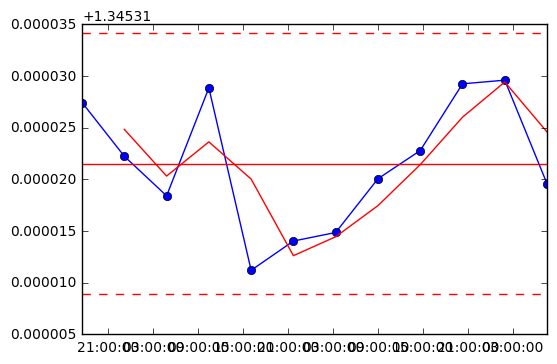

In [19]:
# variation of standard data + mean + 2SD
sel_ratio = "120/118"
plot_Nist = df_internal_norm_mean
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio], linestyle='-', marker='o', color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio].mean(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio].mean()+ 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio].mean()- 2*plot_Nist[sel_ratio].std(), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()

In [21]:
df_all.to_csv(path + "Sn_H9_L4_1_cycles_NU_Signals_zero_corr.csv", mode='w', header=True)

In [20]:
df_internal_norm.to_csv(path + "Sn_H8_L4_1_cycles_Neptune_Sb_corr_all.csv", mode='w', header=True)

In [21]:
df_internal_norm_mean_sd.to_csv(path + "Sn_H8_L4_1_cycles_Neptune_Sb_corr_mean.csv", mode='w', header=True)